<a href="https://colab.research.google.com/github/willystumblr/MySolar-ESS/blob/main/solar_energy_predict/SolarPower_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
%%bash

unzip /content/drive/MyDrive/Colab\ Notebooks/EMS/data_combined.zip

Archive:  /content/drive/MyDrive/Colab Notebooks/EMS/data_combined.zip
   creating: data_combined/
   creating: data_combined/축구장/
  inflating: data_combined/축구장/combined.csv  
   creating: data_combined/학생회관/
  inflating: data_combined/학생회관/combined.csv  
   creating: data_combined/중앙창고/
  inflating: data_combined/중앙창고/combined.csv  
   creating: data_combined/학사과정/
  inflating: data_combined/학사과정/combined.csv  
   creating: data_combined/다산빌딩/
  inflating: data_combined/다산빌딩/combined.csv  
   creating: data_combined/시설관리동/
  inflating: data_combined/시설관리동/combined.csv  
   creating: data_combined/대학C동/
  inflating: data_combined/대학C동/combined.csv  
   creating: data_combined/동물실험동/
  inflating: data_combined/동물실험동/combined.csv  
   creating: data_combined/중앙도서관/
  inflating: data_combined/중앙도서관/combined.csv  
   creating: data_combined/LG도서관/
  inflating: data_combined/LG도서관/combined.csv  
   creating: data_combined/신재생에너지동/
  inflating: data_combined/신재생에너지동/combined.csv  
   creati

# EDA
Find the relationship between each factor for solar power prediction.
We start with the data of LG library dataset. Our goal is to specify which factor we should put into consideration when building an algorithm.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## LG



In [ ]:
import pandas as pd
df_LG = pd.read_csv('/content/data_combined/LG도서관/combined.csv')

In [ ]:
df_LG.head()

,누적발전량(kWh),시간당발전량(kWh),수평면(w/㎡),외기온도(℃),경사면(w/㎡),모듈온도(℃),일시,기온(°C),강수량(mm),풍속(m/s),...,습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),시정(10m),지면온도(°C)
0,69327.9,0.0,0.0,20.3,0.0,19.0,2020-06-01 00:00:00,19.5,0.0,1.9,...,89.0,20.1,17.6,1002.9,0.0,0.0,NaN,10.0,1652.0,19.7
1,69327.9,0.0,0.0,19.8,0.0,18.9,2020-06-01 01:00:00,19.3,0.0,1.7,...,93.0,20.8,18.1,1003.1,0.0,0.0,NaN,10.0,1395.0,19.4
2,69327.9,0.0,0.0,19.1,0.0,18.7,2020-06-01 02:00:00,19.2,0.0,1.6,...,94.0,20.9,18.2,1002.8,0.0,0.0,NaN,10.0,1162.0,19.4
3,69327.9,0.0,0.0,19.2,0.0,18.7,2020-06-01 03:00:00,19.1,0.0,1.0,...,96.0,21.2,18.4,1002.7,0.0,0.0,NaN,10.0,747.0,19.4
4,69327.9,0.0,0.0,18.7,0.0,17.5,2020-06-01 04:00:00,18.6,0.0,0.5,...,98.0,20.9,18.2,1002.6,0.0,0.0,NaN,10.0,509.0,19.3


In [ ]:
df_LG.columns

Index(['누적발전량(kWh)', '시간당발전량(kWh)', '수평면(w/㎡)', '외기온도(℃)', '경사면(w/㎡)',
       '모듈온도(℃)', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)',
       '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '일조(hr)', '일사(MJ/m2)', '적설(cm)',
       '전운량(10분위)', '시정(10m)', '지면온도(°C)'],
      dtype='object')

In [ ]:
df_LG.index

RangeIndex(start=0, stop=18096, step=1)

In [ ]:
df_LG['일시']=pd.to_datetime(df_LG['일시'])

In [ ]:
df_LG.dtypes

누적발전량(kWh)            float64
시간당발전량(kWh)           float64
수평면(w/㎡)              float64
외기온도(℃)               float64
경사면(w/㎡)              float64
모듈온도(℃)               float64
일시             datetime64[ns]
기온(°C)                float64
강수량(mm)               float64
풍속(m/s)               float64
풍향(16방위)              float64
습도(%)                 float64
증기압(hPa)              float64
이슬점온도(°C)             float64
현지기압(hPa)             float64
일조(hr)                float64
일사(MJ/m2)             float64
적설(cm)                float64
전운량(10분위)             float64
시정(10m)               float64
지면온도(°C)              float64
dtype: object

In [ ]:
df_LG = df_LG.assign(Hour = lambda x: x['일시'].dt.hour)
df_LG = df_LG.assign(Month = lambda x: x['일시'].dt.month)
df_LG = df_LG.assign(Year = lambda x: x['일시'].dt.year)
df_LG = df_LG.assign(Day = lambda x: x['일시'].dt.day)

In [ ]:
# df_LG = df_LG.drop(axis=1, columns='일시')

In [ ]:
hour = df_LG['Hour'].astype(int)
y=df_LG['시간당발전량(kWh)']

In [ ]:
sns.boxplot(hour, y)

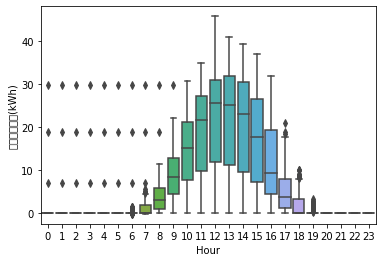

In [ ]:
sns.heatmap()

### Feature Correlation

We now consider the correlation of each feature.

In [ ]:
cor= df_LG.drop(axis=1, columns=[ '누적발전량(kWh)', 'Hour', 'Month', 'Year', '일시', 'Day']).corr()
cor.style.background_gradient(cmap='Greens').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,시간당발전량(kWh),수평면(w/㎡),외기온도(℃),경사면(w/㎡),모듈온도(℃),기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),시정(10m),지면온도(°C)
시간당발전량(kWh),1.00,0.95,0.50,0.89,0.40,0.25,-0.05,0.17,0.21,-0.46,-0.03,-0.04,-0.01,0.76,0.91,-0.17,-0.21,0.19,0.53
수평면(w/㎡),0.95,1.00,0.55,0.89,0.43,0.31,-0.05,0.16,0.20,-0.41,0.04,0.04,-0.09,0.74,0.91,-0.06,-0.18,0.18,0.59
외기온도(℃),0.50,0.55,1.00,0.46,0.60,0.95,0.04,0.21,0.25,0.02,0.73,0.75,-0.68,0.38,0.55,-0.27,0.14,0.15,0.95
경사면(w/㎡),0.89,0.89,0.46,1.00,0.06,0.23,-0.05,0.15,0.18,-0.42,-0.03,-0.03,-0.01,0.71,0.84,-0.09,-0.20,0.18,0.48
모듈온도(℃),0.40,0.43,0.60,0.06,1.00,0.53,0.02,0.14,0.17,-0.06,0.38,0.39,-0.36,0.31,0.43,-0.21,0.05,0.10,0.58
기온(°C),0.25,0.31,0.95,0.23,0.53,1.00,0.06,0.16,0.18,0.16,0.84,0.87,-0.76,0.17,0.32,-0.41,0.17,0.11,0.90
강수량(mm),-0.05,-0.05,0.04,-0.05,0.02,0.06,1.00,0.07,0.00,0.13,0.12,0.11,-0.13,-0.07,-0.06,0.13,0.12,-0.20,0.04
풍속(m/s),0.17,0.16,0.21,0.15,0.14,0.16,0.07,1.00,0.26,-0.15,0.11,0.06,-0.18,0.16,0.22,0.08,0.12,0.14,0.23
풍향(16방위),0.21,0.20,0.25,0.18,0.17,0.18,0.00,0.26,1.00,-0.14,0.07,0.07,-0.17,0.21,0.25,0.00,0.02,0.03,0.24
습도(%),-0.46,-0.41,0.02,-0.42,-0.06,0.16,0.13,-0.15,-0.14,1.00,0.59,0.62,-0.40,-0.54,-0.50,0.15,0.35,-0.45,-0.04


In [ ]:
df_LG.isnull().sum()

누적발전량(kWh)         0
시간당발전량(kWh)        0
수평면(w/㎡)           0
외기온도(℃)            0
경사면(w/㎡)           0
모듈온도(℃)            0
일시                 0
기온(°C)             8
강수량(mm)            0
풍속(m/s)            8
풍향(16방위)           8
습도(%)              4
증기압(hPa)           6
이슬점온도(°C)          7
현지기압(hPa)         31
일조(hr)             0
일사(MJ/m2)          0
적설(cm)         17509
전운량(10분위)         20
시정(10m)            2
지면온도(°C)          31
Hour               0
Month              0
Year               0
Day                0
dtype: int64

Since there are some unecessary factors and some of them even overlap with others, we drop some of the columns from the dataframe. 

In [ ]:
df_LG=df_LG.drop(axis=1, columns=['적설(cm)', '풍향(16방위)', '지면온도(°C)'])

In [ ]:
for col in ['증기압(hPa)', '이슬점온도(°C)', '기온(°C)', '습도(%)', '풍속(m/s)', '전운량(10분위)', '현지기압(hPa)']:
    df_LG[col].fillna(method='ffill', inplace=True)


In [ ]:
df_LG=df_LG.drop(axis=1, columns='시정(10m)')

In [ ]:
def plot_df(df, x, y, title="", xlabel='DateTime', ylabel='Power', dpi=100):
    plt.figure(figsize=(20,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [ ]:
def plot_density_hist(df_weather_actual, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(df_weather_actual[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of data')# Set text for y axis
        plt.show()

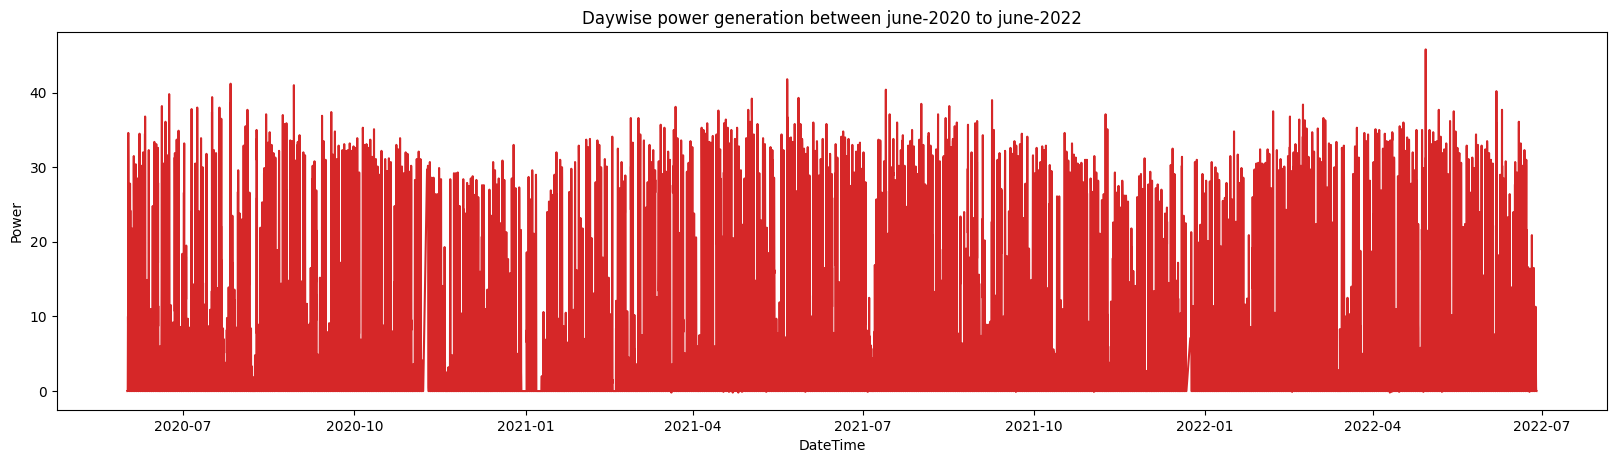

In [ ]:
start_date = '2020-6-01'
end_date = '2022-6-28'
mask = (df_LG.일시 > start_date) & (df_LG.일시 <= end_date)
df_mask = df_LG.loc[mask]

plot_df(df_mask, x=df_mask.일시, y=df_mask['시간당발전량(kWh)'], title='Daywise power generation between june-2020 to june-2022') 


In [ ]:
plot_density_hist(df_LG, list(df_LG.columns), hist=True)        


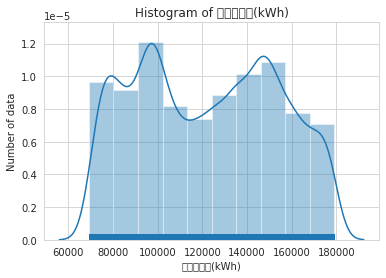

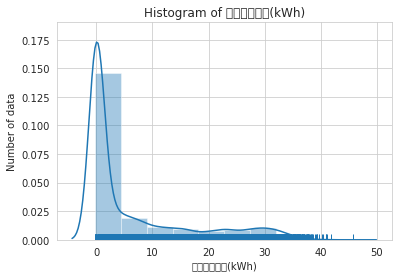

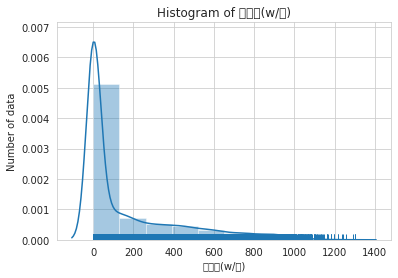

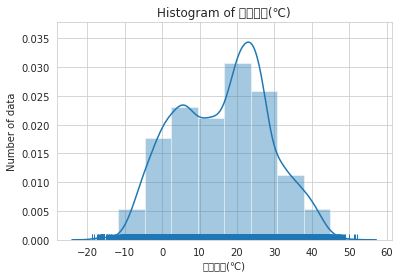

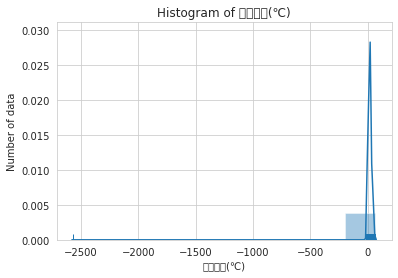

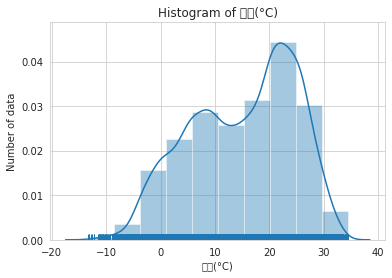

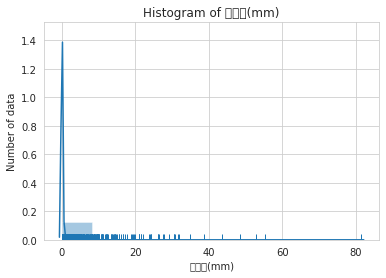

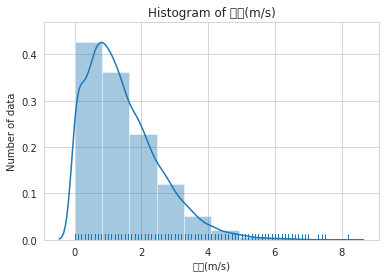

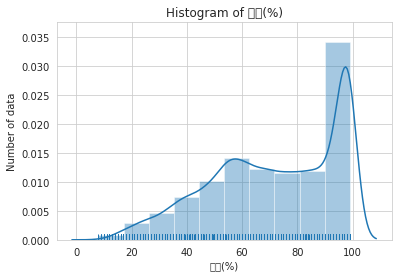


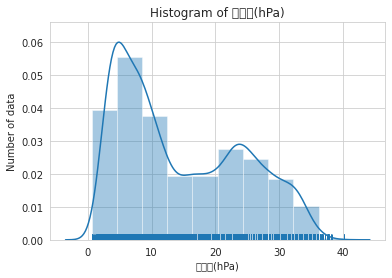

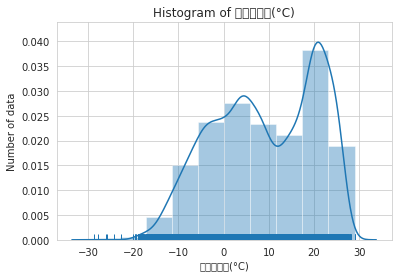

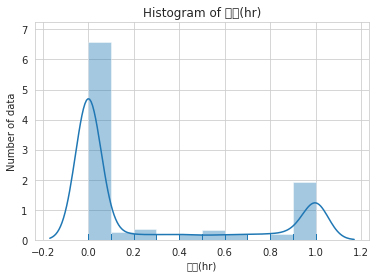

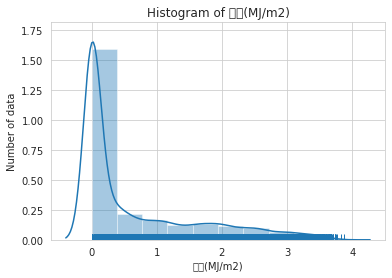

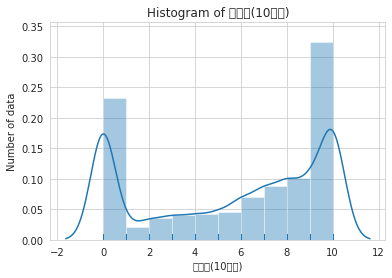

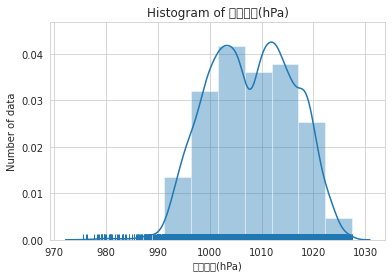

In [ ]:
i = list(df_LG[df_LG['모듈온도(℃)'] < -500].index)

In [ ]:
i

[13212]

In [ ]:
for x in i:
    df_LG['모듈온도(℃)'][x]=(df_LG['모듈온도(℃)'][x-1].copy() + df_LG['모듈온도(℃)'][x+1].copy()) / 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
import decimal
import math
    
def roundHalfUp(value, decimals = 0):
    multiplyWith = 10 ** decimals
    return math.floor(value * multiplyWith + 0.5) / multiplyWith

for x in i:
    df_LG['모듈온도(℃)'][x] = roundHalfUp(df_LG['모듈온도(℃)'][x], 1) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
df_LG['모듈온도(℃)'][13212]

25.8

In [ ]:
import os
import glob
parent = '/content/drive/MyDrive/Colab Notebooks/EMS'
place = os.listdir('data_combined')

In [ ]:
place

['축구장',
 '신재생에너지동',
 '다산빌딩',
 '기숙사B동',
 '삼성환경동',
 '산업협력관',
 'LG도서관',
 '대학C동',
 '동물실험동',
 '학사과정',
 '학생회관',
 '중앙창고',
 '시설관리동',
 '중앙도서관']

In [ ]:
for p in place:
    os.makedirs(os.path.join(parent, p))

In [ ]:
df_LG.to_csv('/content/drive/MyDrive/Colab Notebooks/EMS/LG도서관/data.csv', index=False)

## Others

In [ ]:
import glob

In [ ]:
data_csv = {}

for file in sorted(glob.glob("/content/data_combined/*/combined.csv")):
    name = file.split("/")
    data_csv[name[3]] = pd.read_csv(file)
    print(name[3])

LG도서관
기숙사B동
다산빌딩
대학C동
동물실험동
산업협력관
삼성환경동
시설관리동
신재생에너지동
중앙도서관
중앙창고
축구장
학사과정
학생회관


In [ ]:
data_csv["학생회관"].head()

,누적발전량(kWh),시간당발전량(kWh),수평면(w/㎡),외기온도(℃),경사면(w/㎡),모듈온도(℃),일시,기온(°C),강수량(mm),풍속(m/s),...,습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),시정(10m),지면온도(°C)
0,115412.8,0.0,0.0,20.3,0.0,19.0,2020-06-01 00:00:00,19.5,0.0,1.9,...,89.0,20.1,17.6,1002.9,0.0,0.0,NaN,10.0,1652.0,19.7
1,115412.8,0.0,0.0,19.8,0.0,18.9,2020-06-01 01:00:00,19.3,0.0,1.7,...,93.0,20.8,18.1,1003.1,0.0,0.0,NaN,10.0,1395.0,19.4
2,115412.8,0.0,0.0,19.1,0.0,18.7,2020-06-01 02:00:00,19.2,0.0,1.6,...,94.0,20.9,18.2,1002.8,0.0,0.0,NaN,10.0,1162.0,19.4
3,115412.8,0.0,0.0,19.2,0.0,18.7,2020-06-01 03:00:00,19.1,0.0,1.0,...,96.0,21.2,18.4,1002.7,0.0,0.0,NaN,10.0,747.0,19.4
4,115412.8,0.0,0.0,18.7,0.0,17.5,2020-06-01 04:00:00,18.6,0.0,0.5,...,98.0,20.9,18.2,1002.6,0.0,0.0,NaN,10.0,509.0,19.3


In [ ]:
for data in data_csv:
    data_csv[data]['일시']=pd.to_datetime(data_csv[data]['일시'])

    data_csv[data] = data_csv[data].assign(Hour = lambda x: x['일시'].dt.hour)
    data_csv[data] = data_csv[data].assign(Month = lambda x: x['일시'].dt.month)
    data_csv[data] = data_csv[data].assign(Year = lambda x: x['일시'].dt.year)
    data_csv[data] = data_csv[data].assign(Day = lambda x: x['일시'].dt.day)  

In [ ]:
for data in data_csv:
    print("=========="+data+"==========")
    print(data_csv[data].isnull().sum())
    print("============================")

==========LG도서관==========
누적발전량(kWh)     0
시간당발전량(kWh)    0
수평면(w/㎡)       0
외기온도(℃)        0
경사면(w/㎡)       0
모듈온도(℃)        0
일시             0
기온(°C)         0
강수량(mm)        0
풍속(m/s)        0
습도(%)          0
증기압(hPa)       0
이슬점온도(°C)      0
현지기압(hPa)      0
일조(hr)         0
일사(MJ/m2)      0
전운량(10분위)      0
Hour           0
Month          0
Year           0
Day            0
dtype: int64
==========기숙사B동==========
누적발전량(kWh)     0
시간당발전량(kWh)    0
수평면(w/㎡)       0
외기온도(℃)        0
경사면(w/㎡)       0
모듈온도(℃)        0
일시             0
기온(°C)         0
강수량(mm)        0
풍속(m/s)        0
습도(%)          0
증기압(hPa)       0
이슬점온도(°C)      0
현지기압(hPa)      0
일조(hr)         0
일사(MJ/m2)      0
전운량(10분위)      0
Hour           0
Month          0
Year           0
Day            0
dtype: int64
==========다산빌딩==========
누적발전량(kWh)     0
시간당발전량(kWh)    0
수평면(w/㎡)       0
외기온도(℃)        0
경사면(w/㎡)       0
모듈온도(℃)        0
일시             0
기온(°C)         0
강수량(mm)        0
풍속(m/s)        0
습도(%)        

In [ ]:
for data in data_csv:
    data_csv[data]=data_csv[data].drop(axis=1, columns=['적설(cm)', '풍향(16방위)', '지면온도(°C)', '시정(10m)'])

    for col in ['증기압(hPa)', '이슬점온도(°C)', '기온(°C)', '습도(%)', '풍속(m/s)', '전운량(10분위)', '현지기압(hPa)']:
        data_csv[data][col].fillna(method='ffill', inplace=True)



In [ ]:
data_csv[data].columns

Index(['누적발전량(kWh)', '시간당발전량(kWh)', '수평면(w/㎡)', '외기온도(℃)', '경사면(w/㎡)',
       '모듈온도(℃)', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '증기압(hPa)',
       '이슬점온도(°C)', '현지기압(hPa)', '일조(hr)', '일사(MJ/m2)', '전운량(10분위)', 'Hour',
       'Month', 'Year', 'Day'],
      dtype='object')

In [ ]:
import decimal
import math
    
def roundHalfUp(value, decimals = 0):
    multiplyWith = 10 ** decimals
    return math.floor(value * multiplyWith + 0.5) / multiplyWith

In [ ]:
for data in data_csv:
    
    i = list(data_csv[data][(data_csv[data]['모듈온도(℃)'] < -500)].index)
    print(data+":", end=" ")
    print(i, end="\n")

    for x in i:
        data_csv[data]['모듈온도(℃)'][x]=roundHalfUp((data_csv[data]['모듈온도(℃)'][x-1].copy() + data_csv[data]['모듈온도(℃)'][x+1].copy()) / 2, 1)
        

LG도서관: [13212]
기숙사B동: [12300]
다산빌딩: [13212]
대학C동: [13212]
동물실험동: [13212]
산업협력관: [12300]
삼성환경동: [13212]
시설관리동: [13212]
신재생에너지동: [13212]
중앙도서관: [13212]
중앙창고: [13212]
축구장: [13212]
학사과정: [13212]
학생회관: [13212]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for data in data_csv:
    i = list(data_csv[data][(data_csv[data]['경사면(w/㎡)'] > 2500)].index)
    print(data+":", end=" ")
    print(i, end="\n")

    for x in i:
        data_csv[data]['경사면(w/㎡)'][x]=roundHalfUp((data_csv[data]['경사면(w/㎡)'][x-1].copy() + data_csv[data]['경사면(w/㎡)'][x+1].copy()) / 2, 1)
    
    j = list(data_csv[data][(data_csv[data]['경사면(w/㎡)'] > 2500)].index)
    print("======AFTER=====")
    print(data+":", end=" ")
    print(j, end="\n")
    print("================")

LG도서관: [13212]
======AFTER=====
LG도서관: []
기숙사B동: [12300]
======AFTER=====
기숙사B동: []
다산빌딩: [13212]
======AFTER=====
다산빌딩: []
대학C동: [13212]
======AFTER=====
대학C동: []
동물실험동: [13212]
======AFTER=====
동물실험동: []
산업협력관: [12300]
======AFTER=====
산업협력관: []
삼성환경동: [13212]
======AFTER=====
삼성환경동: []
시설관리동: [13212]
======AFTER=====
시설관리동: []
신재생에너지동: [13212]
======AFTER=====
신재생에너지동: []
중앙도서관: [13212]
======AFTER=====
중앙도서관: []
중앙창고: [13212]
======AFTER=====
중앙창고: []
축구장: [13212]
======AFTER=====
축구장: []
학사과정: [13212]
======AFTER=====
학사과정: []
학생회관: [13212]
======AFTER=====
학생회관: []


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
import os

PATH = "/content/drive/MyDrive/Colab Notebooks/EMS/*/"

for data, output in zip(data_csv, sorted(glob.glob(PATH))):
    
    data_csv[data].to_csv(output+"data.csv", index=False)
    

In [ ]:
for data in data_csv:
    print(data+": ")
    print(data_csv[data].dtypes)
    print("====================")

LG도서관: 
누적발전량(kWh)            float64
시간당발전량(kWh)           float64
수평면(w/㎡)              float64
외기온도(℃)               float64
경사면(w/㎡)              float64
모듈온도(℃)               float64
일시             datetime64[ns]
기온(°C)                float64
강수량(mm)               float64
풍속(m/s)               float64
습도(%)                 float64
증기압(hPa)              float64
이슬점온도(°C)             float64
현지기압(hPa)             float64
일조(hr)                float64
일사(MJ/m2)             float64
전운량(10분위)             float64
Hour                    int64
Month                   int64
Year                    int64
Day                     int64
dtype: object
기숙사B동: 
누적발전량(kWh)             object
시간당발전량(kWh)            object
수평면(w/㎡)              float64
외기온도(℃)               float64
경사면(w/㎡)              float64
모듈온도(℃)               float64
일시             datetime64[ns]
기온(°C)                float64
강수량(mm)               float64
풍속(m/s)               float64
습도(%)                 float64
증기압(hPa)  

In [ ]:
indices = []
for i, val in enumerate(data_csv["기숙사B동"]["시간당발전량(kWh)"]):
    if val == "-":
        print("Convert!")
        data_csv["기숙사B동"]["시간당발전량(kWh)"].iloc[i] = 0.0

Convert!
Convert!
Convert!
Convert!
Convert!
Convert!
Convert!


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
indices = []
for i, val in enumerate(data_csv["다산빌딩"]["시간당발전량(kWh)"]):
    if val == "-":
        print("Convert!")
        data_csv["다산빌딩"]["시간당발전량(kWh)"].iloc[i] = 0.0
        indices.append(i)

In [ ]:
len(data_csv["다산빌딩"]["시간당발전량(kWh)"])

18096

In [ ]:
len(data_csv["중앙도서관"]["시간당발전량(kWh)"])

18096

In [ ]:
for i, val in enumerate(data_csv["다산빌딩"]["시간당발전량(kWh)"]):
    if i in indices:
        print(data_csv["다산빌딩"]["일시"].iloc[i], end=" & ")
        print(data_csv["중앙도서관"]["일시"].iloc[i], end="\n")
        data_csv["다산빌딩"]["시간당발전량(kWh)"].iloc[i] = data_csv["중앙도서관"]["시간당발전량(kWh)"].iloc[i].copy()
        """
        Since 중앙도서관 is the nearest from 다산빌딩, we put it's value instead.
        """

In [ ]:
indices = []
for i, val in enumerate(data_csv["산업협력관"]["시간당발전량(kWh)"]):
    if val == "-":
        print("Need to convert!")
        
        indices.append(i)

Need to convert!
Need to convert!
Need to convert!
Need to convert!
Need to convert!
Need to convert!
Need to convert!


In [ ]:
len(data_csv["산업협력관"]["시간당발전량(kWh)"])

17184

In [ ]:
[data_csv["산업협력관"]["일시"].iloc[i] for i in indices]

[Timestamp('2020-07-21 17:00:00'),
 Timestamp('2020-07-21 18:00:00'),
 Timestamp('2020-07-21 19:00:00'),
 Timestamp('2020-07-21 20:00:00'),
 Timestamp('2020-07-21 21:00:00'),
 Timestamp('2020-07-21 22:00:00'),
 Timestamp('2020-07-21 23:00:00')]

In [ ]:
[data_csv["동물실험동"]["일시"].iloc[i+912] for i in indices]

[Timestamp('2020-07-21 17:00:00'),
 Timestamp('2020-07-21 18:00:00'),
 Timestamp('2020-07-21 19:00:00'),
 Timestamp('2020-07-21 20:00:00'),
 Timestamp('2020-07-21 21:00:00'),
 Timestamp('2020-07-21 22:00:00'),
 Timestamp('2020-07-21 23:00:00')]

In [ ]:
[data_csv["동물실험동"]["시간당발전량(kWh)"].iloc[i+912] for i in indices]

[8.1, 1.5, 0.4, 0.0, 0.0, 0.0, 0.0]

In [ ]:
for i, val in enumerate(data_csv["산업협력관"]["시간당발전량(kWh)"]):
    if i in indices:
        print(data_csv["산업협력관"]["일시"].iloc[i], end=" & ")
        print(data_csv["동물실험동"]["일시"].iloc[i+912], end="\n")
        data_csv["산업협력관"]["시간당발전량(kWh)"].iloc[i] = data_csv["동물실험동"]["시간당발전량(kWh)"].iloc[i+912].copy()
        """
        Since 중앙도서관 is the nearest from 다산빌딩, we put it's value instead.
        """

2020-07-21 17:00:00 & 2020-07-21 17:00:00
2020-07-21 18:00:00 & 2020-07-21 18:00:00
2020-07-21 19:00:00 & 2020-07-21 19:00:00
2020-07-21 20:00:00 & 2020-07-21 20:00:00
2020-07-21 21:00:00 & 2020-07-21 21:00:00
2020-07-21 22:00:00 & 2020-07-21 22:00:00
2020-07-21 23:00:00 & 2020-07-21 23:00:00


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
for b in data_csv.keys():
    print(f"{b}: {len(data_csv[b])}")

LG도서관: 18096
기숙사B동: 17184
다산빌딩: 18096
대학C동: 18096
동물실험동: 18096
산업협력관: 17184
삼성환경동: 18096
시설관리동: 18096
신재생에너지동: 18096
중앙도서관: 18096
중앙창고: 18096
축구장: 18096
학사과정: 18096
학생회관: 18096


In [ ]:
indices = []
for i, val in enumerate(data_csv["학사과정"]["시간당발전량(kWh)"]):
    if val == "-":
        
        indices.append(i)

print(len(indices))        

2504


In [ ]:
for i, val in enumerate(data_csv["학사과정"]["시간당발전량(kWh)"]):
    if i in indices:
        print(data_csv["학사과정"]["일시"].iloc[i], end=" & ")
        print(data_csv["대학C동"]["일시"].iloc[i], end="\n")
        data_csv["학사과정"]["시간당발전량(kWh)"].iloc[i] = data_csv["대학C동"]["시간당발전량(kWh)"].iloc[i].copy()
        """
        Since 대학C동 is the nearest from 학사과정, we put it's value instead.
        """

In [ ]:
indices = []
for i, val in enumerate(data_csv["학생회관"]["시간당발전량(kWh)"]):
    if val == "-":
        
        indices.append(i)

print(len(indices))

158


In [ ]:
for i, val in enumerate(data_csv["학생회관"]["시간당발전량(kWh)"]):
    if i in indices:
        print(data_csv["학생회관"]["일시"].iloc[i], end=" & ")
        print(data_csv["대학C동"]["일시"].iloc[i], end="\n")
        data_csv["학생회관"]["시간당발전량(kWh)"].iloc[i] = data_csv["대학C동"]["시간당발전량(kWh)"].iloc[i].copy()
        """
        Since 대학C동 is the nearest from 학생회관, we put it's value instead.
        """

In [ ]:
for data in data_csv:
    if data_csv[data]["시간당발전량(kWh)"].dtypes != 'float64': 
        print("Convert!")
        data_csv[data]["시간당발전량(kWh)"] = pd.to_numeric(data_csv[data]["시간당발전량(kWh)"])

Convert!
Convert!
Convert!
Convert!
Convert!


In [ ]:
for data in data_csv:

    data_csv[data] = data_csv[data].assign(Cloud = lambda x: x['전운량(10분위)'] >= 5)


In [ ]:
data_csv[data]["Cloud"].head(24)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
Name: Cloud, dtype: bool